In [1]:
#Imports the modules needed for plotting and restructuring
import numpy as np
import matplotlib.pyplot as pt
from mpl_toolkits.mplot3d import Axes3D

In [8]:
#Import the data, note you will have to change the file path to wherever your data is
with open('/Users/pcastano/Desktop/Research/PANDA Research/Photonic Band Gap (PBG)/Capacitor Plates/Aya_Simulation.txt','r') as fin:
    data = fin.read().splitlines(True)
with open('/Users/pcastano/Desktop/Research/PANDA Research/Photonic Band Gap (PBG)/Capacitor Plates/Aya_Simulation.txt','w') as fout:
    fout.writelines(data[1:]) #deletes the header line from the file


In [9]:
setlist = []
#This is the part im least sure about, I feel like there must be a better way of doing this
for element in data:
    divided = element.split() #splits the strings into the two values
    numonly = [x.replace(',','') for x in divided] #gets rid of one extra comma at the end of theta values
    floats = [float(x) for x in numonly] #converts the strings to floats
    setlist.append(floats) #adds each line to the new data array
    
# splits the data array into lists of values for x and y
xval = [x[0] for x in setlist] 
yval = [x[1] for x in setlist]

In [10]:
def Area(theta, a, b):
    return float(np.piecewise(theta,[theta < np.arcsin(b/a),theta > np.arcsin(b/a)],[lambda theta: a/2*np.sqrt(((a/np.cos(theta))- b*np.tan(theta))**2 + b**2 - a**2) + b/2*((a/np.cos(theta)) - b*np.tan(theta)), lambda theta: abs((b**2/2)*(1/np.tan(theta)))]))

/var/folders/9j/6wwljwqj6vv9g84djzr9kvv40000gn/T/ipykernel_97092/2865254830.py:2: RuntimeWarning: invalid value encountered in arcsin
  return float(np.piecewise(theta,[theta < np.arcsin(b/a),theta > np.arcsin(b/a)],[lambda theta: a/2*np.sqrt(((a/np.cos(theta))- b*np.tan(theta))**2 + b**2 - a**2) + b/2*((a/np.cos(theta)) - b*np.tan(theta)), lambda theta: abs((b**2/2)*(1/np.tan(theta)))]))
/var/folders/9j/6wwljwqj6vv9g84djzr9kvv40000gn/T/ipykernel_97092/2094293223.py:25: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


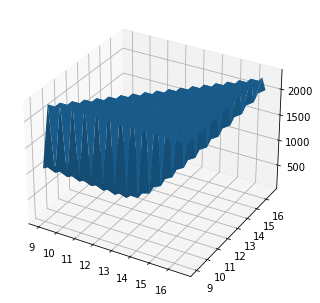

In [16]:
#Caution, over 50 this takes a while, I havent ran it past 75
n = 20
start = 9
stop = 17
res = np.zeros((n,n))

step = (stop-start)/n

for i in range(n):
    for j in range(n):
        ssq = 0
        for k in range(len(xval)):
            area = Area(np.radians(xval[k]),start+step*i,start+step*j)
            residual = yval[k]-area
            ssq = np.sqrt(ssq**2+residual**2)
        res[i,j] = ssq
            
       
    
X = np.arange(start,stop,step)
Y = np.arange(start,stop,step)
XX,YY = np.meshgrid(X,Y)
    
fig = pt.figure()
ax = Axes3D(fig)

# Make data.

# Plot the surface.
surf = ax.plot_surface(XX, YY, res)
    

In [12]:
np.where(res==np.min(res))

(array([13]), array([2]))

In [13]:
#input the index values for X and Y to get the values of A and B
A = X[13]
B = Y[2]
print(A)
print(B)

15.933333333333332
10.066666666666666


In [103]:
#Finds corresponding predicted values to plot
pre = []
for x in np.arange(0,90,0.0001):
    area = Area(np.radians(x),A,B)
    pre.append(area)

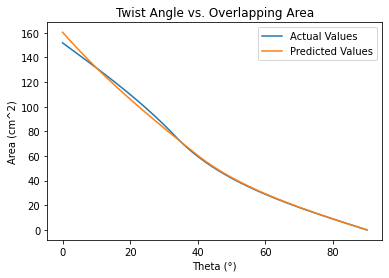

In [104]:
#This creates the plot you want
pt.title('Twist Angle vs. Overlapping Area')
pt.xlabel('Theta (°)')
pt.ylabel('Area (cm^2)')
pt.plot(xval,yval,label = 'Actual Values')
pt.plot(np.arange(0,90,0.0001),pre, label = 'Predicted Values')

pt.legend()
pt.show()


In [92]:
a = 15.18
b = 10
def leftside(angle, a,b):
    return a/2*np.sqrt(((a/np.cos(angle))- b*np.tan(angle))**2 + b**2 - a**2) + b/2*((a/np.cos(angle)) - b*np.tan(angle))
def rightside(angle2, a,b):
    return abs((b**2/2)*(1/np.tan(angle2)))


In [95]:
results = []
numbers = []
for i in range(0,40):
    results.append(leftside(i*np.pi/180, a,b))
    numbers.append(i)

for i in range(41,90):
    results.append(rightside(i*np.pi/180, a, b))
    numbers.append(i)

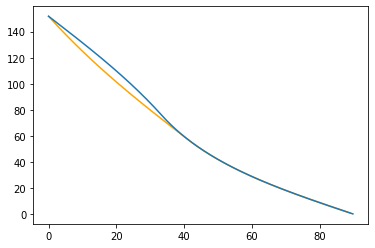

In [107]:
pt.plot(numbers, results, 'orange')
pt.plot(xval[0:899],yval[0:899])